# First implementation of Machine Learning Algorithm

In this file, we are going to import data from a file .csv that we take from chornograf.
We have to parse him and put into an array.
Finally we will insert some machin Learning algorithm with the librairy sklearn.

To do this, we will use some librairy as pandas, matplotlib, numpy, sklearn and some others.


In [1]:
from sklearn import linear_model
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dans le fichier DataDemeterAll.csv

Toutes les données de puis 1970h à partir 7 mars au 28 mai

SELECT mean("temperature") AS "mean_temperature", mean("moisture-percent") AS "mean_moisture-percent"

FROM "demeter"."autogen"."chirp-left"

WHERE time > now() -2536h

GROUP BY time(30m) FILL(null)

# Import des données 

Leccture d'un fichier csv en un fichier dataframe.

Création d'une base dataframe avec comme colonne le temps, l'humidité, la tempérture, l'humidité + 1, la température + 1.

Il faut régler le problème tu dernier temps.

In [2]:
from traitement import Traitement


df = pd.read_csv('DataDemeter.csv')

t= Traitement()

#Création des deux autres colonnes
df = t.ajoutData(df)

## Ajout de l'arrosage

L'arrosage est ajouté au temps 10h30 ou 11h30.

In [3]:
import datetime

df = t.arrosageHist(df,1)
df['index'] = df.index
nligne = df.shape[0]
position = df.shape[1]-1
for i in range(nligne):
    df.iloc[i,position] = (i-6)//48 + 1
df.drop(df.index[df['index'] == 76], axis = 0, inplace = True)
df.drop(df.index[df['index'] == 75], axis = 0, inplace = True)
df.drop(df.index[df['index'] == 15], axis = 0, inplace = True)
df.drop(df.index[df['index'] == 102], axis = 0, inplace = True)
df.drop(df.index[df['index'] == 96], axis = 0, inplace = True)
df.drop(df.index[df['index'] == 97], axis = 0, inplace = True)
df.drop(df.index[df['index'] == 98], axis = 0, inplace = True)
df.drop(df.index[df['index'] == 41], axis = 0, inplace = True)



df

,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage,ArrosageHist,index
0,3/7/2019 7:30:00.000000000 AM,32.392593,25.083333,-0.142593,0.085000,0,0,0,0
1,3/7/2019 8:00:00.000000000 AM,32.250000,25.168333,-0.156667,0.126667,0,30,0,0
2,3/7/2019 8:30:00.000000000 AM,32.093333,25.295000,-0.078333,0.365000,0,60,0,0
3,3/7/2019 9:00:00.000000000 AM,32.015000,25.660000,-0.045000,-0.056667,0,90,0,0
4,3/7/2019 9:30:00.000000000 AM,31.970000,25.603333,-0.043333,0.071667,0,120,0,0
5,3/7/2019 10:00:00.000000000 AM,31.926667,25.675000,0.006667,0.138333,0,150,0,0
6,3/7/2019 10:30:00.000000000 AM,31.933333,25.813333,9.233333,-0.146667,10,0,10,1
7,3/7/2019 11:00:00.000000000 AM,41.166667,25.666667,-2.988333,0.676667,0,30,10,1
8,3/7/2019 11:30:00.000000000 AM,38.178333,26.343333,-1.380000,2.026667,0,60,10,1
9,3/7/2019 12:00:00.000000000 PM,36.798333,28.370000,-1.225000,4.456667,0,90,10,1


# Delete NaN Value

In [4]:
i = 6

df = t.eliminateNaNValue(df,i)
#Delete the data that are not inside a loop of one day
df.drop(df.index[range(0,i+48*3)],axis = 0,inplace = True)

nligne = df.shape[0]
print("nombre de ligne", nligne)


nombre de ligne 4395


In [5]:
nligne = df.shape[0]
nColumn = df.shape[1]
print(df.isnull().sum())
for i in range(nligne):
    if df.iloc[i,:].isnull().values.any():
        print(df.index[i])
        

date                     0
mean_moisture-percent    0
mean_temperature         0
moistureAdd              0
temperatureAdd           0
Arrosage                 0
TAfterArrosage           0
ArrosageHist             0
index                    0
dtype: int64


# Data Test

Extraction des données aléatoire sur toutes les datasets. 7 jours entiers sont pris pour les tests.
Les données pour les Tests sont exclus des données pour le training

In [6]:
import random
jour = nligne //48
print("nb de jour totale : ",jour)
incr = 0
jourTest = random.sample(range(1,jour),k=14)
jourTest.sort()
print("jour de test : ",jourTest)


nb de jour totale :  91
jour de test :  [12, 17, 21, 22, 24, 27, 29, 31, 36, 46, 48, 58, 66, 71]


In [7]:
indTest = []
for el in jourTest:
    indTest = np.append(indTest,range(int(48*(el-1)),int(48*el)))
indTest = indTest.astype(int)
dataTest = df.iloc[indTest,:].copy()
DF = df.copy()
df.drop(df.index[indTest],axis = 0,inplace = True)


# Analyse de la dataFrame


## Linear Regression Multiple Variables sans l'information sur le temps sans arrosage



In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['mean_moisture-percent','mean_temperature','Arrosage']],df.moistureAdd)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.coef_

array([-0.03005161, -0.019421  ,  0.22176613])

In [10]:
reg.intercept_

1.0251581227792657

In [11]:
reg.predict([[31,25,10]])[0]

1.8256943909707744

## Linear Regression Multiple Variables AVEC l'information sur le temps sans arrosage

In [12]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg2.coef_

array([ -2.23285590e-02,   1.65659008e-04,   2.28907800e-01,
         2.66809924e-04])

In [14]:
reg2.intercept_

0.15460452230171731

In [15]:
reg2.predict([[31,25,10,0]])[0]

1.7556386721032462



# Test avec data Test

On fait nos tests avec notre dataTest créé ci-dessus

## Test avec les donnes SANS le temps

In [16]:
init = 0+48*0
dataTest['resultSansT'] = dataTest.index
position = dataTest.shape[1]-1

StartHumidity = dataTest.iloc[init,1]
TestSize = dataTest.shape[0]
result = np.zeros(TestSize)
for i in range(0,TestSize):
    dataTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dataTest.iloc[init+i,1]
    result[i] = StartHumidity + reg.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5]]])[0]
    StartHumidity = result[i]
    

#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrSansTemps = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrSansTempsAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))

print("Moyenne d'erreur : ",ErrSansTemps)
print("Moyenne d'erreur absolue : ",ErrSansTempsAbs)


Moyenne d'erreur :  -1.40881925166
Moyenne d'erreur absolue :  2.11946760129


## Test avec les donnes AVEC le temps

In [17]:
init = 0+48*0
dataTest['resultAvecT'] = dataTest.index
position = dataTest.shape[1]-1

StartHumidity = dataTest.iloc[init,1]

TestSize = dataTest.shape[0]
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dataTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dataTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg2.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5],dataTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrTemps = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrTempsAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))

print("Moyenne d'erreur : ",ErrTemps)
print("Moyenne d'erreur absolue : ",ErrTempsAbs)


Moyenne d'erreur :  -0.666742821506
Moyenne d'erreur absolue :  1.47344051767


# Partage de la Data frame

Partage de la data frame en deux. 

Une partie qui contient que les moments où on arrose. On peut selectionner ceci grace à loc et à df['TAfterArrosage'] == 0. Quand on arrose, le temps après arrosage est de 0.

L'autre partie contient les moments où on n'arrose pas. C'est-à-dire les momments où l'eau s'évapore.

In [18]:
limite = 240
dfArrosage = df.loc[df['TAfterArrosage'] == 0]
tmp = df.loc[df['TAfterArrosage'] > 0]
dfStabilisation = df.loc[df['TAfterArrosage'] > limite].copy()
dfEvaporation = tmp.loc[df['TAfterArrosage'] <= limite].copy()

In [19]:
regLinearAro = linear_model.LinearRegression()
regLinearAro.fit(dfArrosage[['mean_moisture-percent','Arrosage','index']],dfArrosage.moistureAdd)
regLinearAro.intercept_
regLinearAro.coef_

array([-0.04434566,  0.02862209, -0.03328727])

In [20]:
# Pour faire le régression linear sur le moment d'arrosage
regLinearEva = linear_model.LinearRegression()
regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfEvaporation.moistureAdd)
regLinearEva.intercept_
regLinearEva.coef_

array([-0.01833267, -0.05525615,  0.00844711, -0.00056389,  0.00154064])

In [21]:
# Pour faire le régression linear sur le moment d'arrosage
regLinearSta = linear_model.LinearRegression()
regLinearSta.fit(dfStabilisation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfStabilisation.moistureAdd)
regLinearSta.intercept_
regLinearSta.coef_

array([ -4.04928663e-03,   4.16932051e-03,   1.83461203e-05,
         6.69080034e-04,   1.42356456e-04])

In [22]:
#Pour tester sur la base de données de training
init = 0
base = dataTest 

In [23]:
dataTest['resultSepare'] = dataTest.index
StartHumidity = base.iloc[init,1]
position = dataTest.shape[1]-1


TestSize = dataTest.shape[0]
ErrAro = 0
result = np.zeros(TestSize)
ErrEva = 0
nAro = 0

for i in range(0,TestSize-1):
    dataTest.iloc[int(i),position] = StartHumidity

    if dataTest.iloc[i,6] == 0:
        nAro =+ 1
        StartHumidity = dataTest.iloc[i,1]
        result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,base.iloc[init+i,5],base.iloc[init+i,8]]])[0]
        ErrAro =+ abs(result[i] - base.iloc[i+1,1])
    elif dataTest.iloc[i,6] <= limite:
        result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6],base.iloc[init+i,7],base.iloc[init+i,8]]])[0]
        ErrEva =+ abs(result[i] - base.iloc[i+1,1])
    else:
        result[i] = StartHumidity + regLinearSta.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6],base.iloc[init+i,7],base.iloc[init+i,8]]])[0]
        ErrSta =+ abs(result[i] - base.iloc[i+1,1])

    StartHumidity = result[i]
dataTest.iloc[TestSize-1,position] = StartHumidity

ErrAro = ErrAro/nAro
ErrEva = ErrEva/(15*nAro)
ErrSta = ErrSta/((48-16*nAro))

print("Moyenne Erreur d'Arrosage : ", ErrAro)
print("Moyenne d'erreur evaporation : ", ErrEva)
print("Moyenne d'erreur stabilisation : ", ErrSta)

ErrSepare = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrSepareAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))
print("Moyenne d'erreur : ",ErrSepare)
print("Moyenne d'erreur absolue : ",ErrSepareAbs)


Moyenne Erreur d'Arrosage :  0.426247307152
Moyenne d'erreur evaporation :  0.0833659553509
Moyenne d'erreur stabilisation :  0.0367448714882
Moyenne d'erreur :  -0.596006310148
Moyenne d'erreur absolue :  1.05914013775


In [24]:
dataTest

,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage,ArrosageHist,index,resultSansT,resultAvecT,resultSepare
726,3/22/2019 10:30:00.000000000 AM,20.400000,24.903333,4.796667e+00,0.328333,10,0,10,16,20.400000,20.400000,20.400000
727,3/22/2019 11:00:00.000000000 AM,25.196667,25.231667,-1.030000e+00,0.341667,0,30,10,16,22.546119,22.392305,28.046701
728,3/22/2019 11:30:00.000000000 AM,24.166667,25.573333,-7.433333e-01,2.343333,0,60,10,16,22.403706,22.059106,26.461540
729,3/22/2019 12:00:00.000000000 PM,23.423333,27.916667,-9.150000e-01,4.013333,0,90,10,16,22.258936,21.741408,25.139973
730,3/22/2019 12:30:00.000000000 PM,22.508333,31.930000,-3.366667e-01,1.443333,0,120,10,16,22.073008,21.439195,23.966564
731,3/22/2019 1:00:00.000000000 PM,22.171667,33.373333,-9.083333e-01,1.996667,0,150,10,16,21.814724,21.152400,22.846319
732,3/22/2019 1:30:00.000000000 PM,21.263333,35.370000,-8.733333e-01,1.055000,0,180,10,16,21.536171,20.880252,21.920270
733,3/22/2019 2:00:00.000000000 PM,20.390000,36.425000,-5.866667e-01,1.130000,0,210,10,16,21.227212,20.622516,21.154284
734,3/22/2019 2:30:00.000000000 PM,19.803333,37.555000,-6.833333e-01,0.535000,0,240,10,16,20.907048,20.378714,20.597458
735,3/22/2019 3:00:00.000000000 PM,19.120000,38.090000,-4.266667e-01,1.306667,0,270,10,16,20.574560,20.148547,20.241814


In [25]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5] 
  
# heights of bars 
height = [ErrSepareAbs5,ErrSepareAbs4, ErrSepareAbs3, ErrSepareAbs2,ErrSepareAbs1]
height = [abs(x) for x in height]

f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)
# labels for bars 
tick_label = ['Temp+Moist', 'Temp+Moist+Temps', 'T+M+Arro','T+M+Arro+Temps','All'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green']) 

# naming the x-axis 
plt.xlabel('Paramètre choisi') 
# naming the y-axis 
plt.ylabel('Erreur absolu') 
# plot title 
plt.title('Erreur suivant les paramètres utilisés') 
  
# function to show the plot 
plt.show() 

NameError: name 'ErrSepareAbs5' is not defined

# Affichage des résultats

On Affiche les resultats

In [26]:
print("Sans le temps : ", ErrSansTemps)
print("Sans le temps absolue : ", ErrSansTempsAbs)

print("\nAvec le temps : ", ErrTemps)
print("Avec le temps absolu : ", ErrTempsAbs)


#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("\nAvec Temps Séparé : ", ErrSepare)
print("Avec Temps Séparé absolu : ", ErrSepareAbs)


Sans le temps :  -1.40881925166
Sans le temps absolue :  2.11946760129

Avec le temps :  -0.666742821506
Avec le temps absolu :  1.47344051767

Avec Temps Séparé :  -0.596006310148
Avec Temps Séparé absolu :  1.05914013775


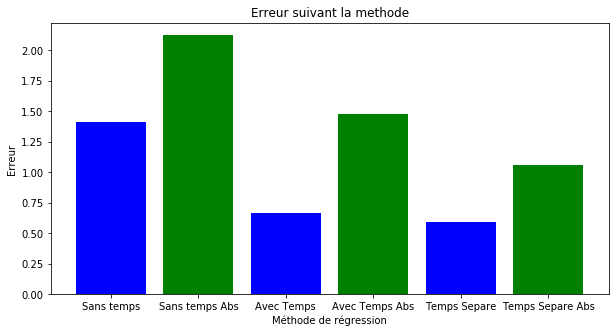

In [27]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6] 
  
# heights of bars 
height = [ErrSansTemps,ErrSansTempsAbs, ErrTemps, ErrTempsAbs, ErrSepare,ErrSepareAbs]
height = [abs(x) for x in height]

  
# labels for bars 
tick_label = ['Sans temps', 'Sans temps Abs', 'Avec Temps','Avec Temps Abs', 'Temps Separe','Temps Separe Abs'] 
f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green']) 

# naming the x-axis 
plt.xlabel('Méthode de régression') 
# naming the y-axis 
plt.ylabel('Erreur') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

# Graphic

Creation des graphics de la courbe d'évolution de la température



Text(0, 0.5, 'Watering quantity')

<Figure size 432x288 with 0 Axes>

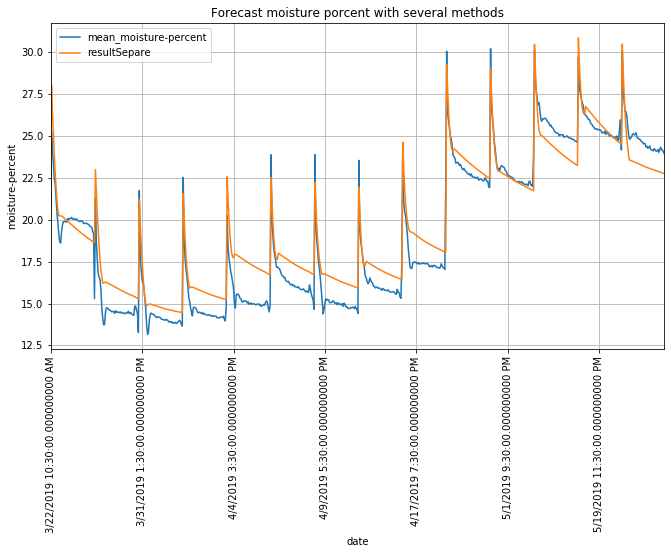

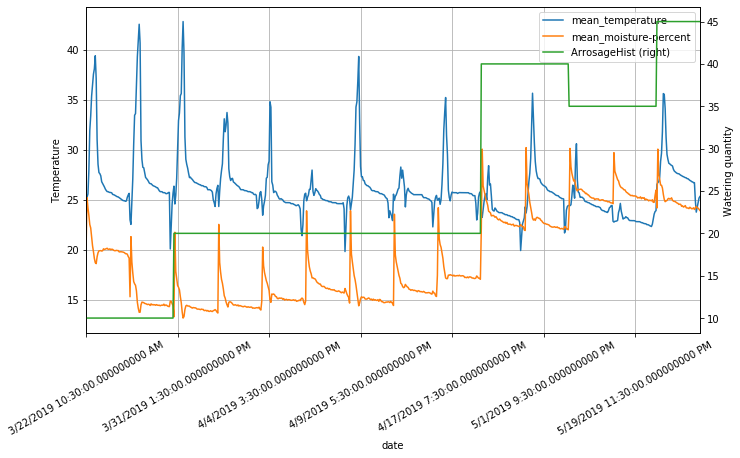

In [28]:
fig = plt.figure()
ax = dataTest.plot(x='date', y=['mean_moisture-percent','resultSepare',],figsize=(11, 6),rot=90,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")

ax = dataTest.plot(x='date', y=['mean_temperature','mean_moisture-percent','ArrosageHist'],secondary_y=['ArrosageHist'],figsize=(11, 6),rot=30,grid=True)

ax.set_ylabel("Temperature")
ax.right_ax.set_ylabel('Watering quantity')


#dfTest.loc[dfTest['TAfterArrosage'] == 30]

## recherche de la meilleures delimitation pour le partitionnement en 3



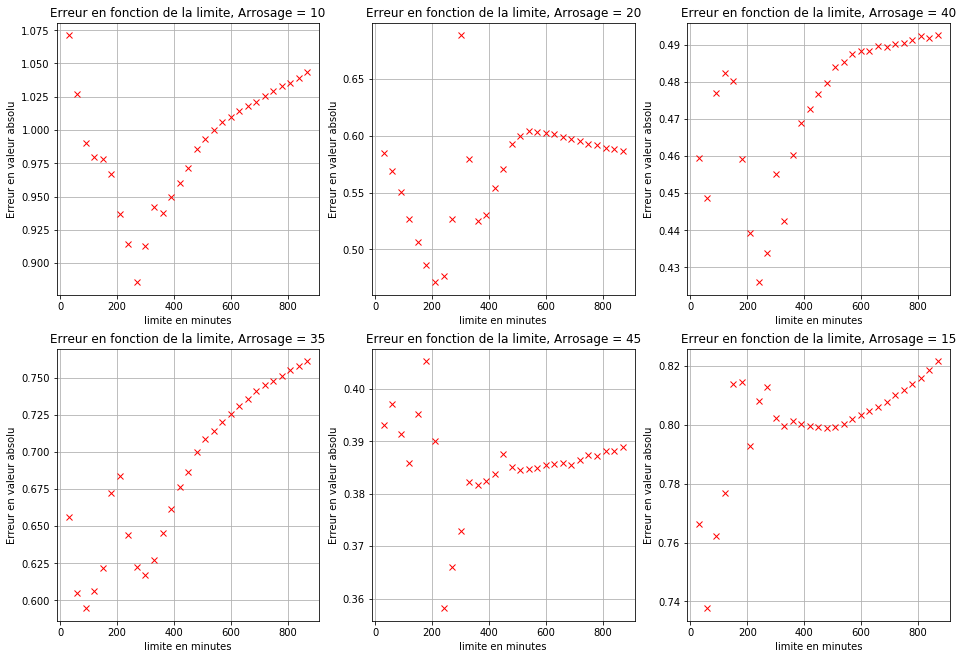

In [29]:
j = 1
f, ax = plt.subplots(figsize=(16,11))
for ARRO in [10,20,40,35,45,15]:
    dfarro = DF.loc[DF['ArrosageHist'] == ARRO]
    dfArrosage = dfarro.loc[dfarro['TAfterArrosage'] == 0]
    tmp = dfarro.loc[dfarro['TAfterArrosage'] > 0]

    bestLimite = 0
    errmin = 1000
    res = np.zeros(900//30-1)
    for limite in range(30,900,30):

        dfStabilisation = dfarro.loc[dfarro['TAfterArrosage'] > limite].copy()
        dfEvaporation = tmp.loc[dfarro['TAfterArrosage'] <= limite].copy()

        regLinearAro = linear_model.LinearRegression()
        regLinearAro.fit(dfArrosage[['mean_moisture-percent','Arrosage','index']],dfArrosage.moistureAdd)
        regLinearEva = linear_model.LinearRegression()
        regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfEvaporation.moistureAdd)
        regLinearSta = linear_model.LinearRegression()
        regLinearSta.fit(dfStabilisation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfStabilisation.moistureAdd)


        databasetest = dfarro.copy()
        databasetest['resultSepare'] = databasetest.index
        StartHumidity = databasetest.iloc[0,1]
        position = databasetest.shape[1]-1
        TestSize = databasetest.shape[0]
        result = np.zeros(TestSize)

        for i in range(0,TestSize-1):
            databasetest.iloc[int(i),position] = StartHumidity

            if databasetest.iloc[i,6] == 0:
                StartHumidity = databasetest.iloc[i,1]
                result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,databasetest.iloc[i,5],databasetest.iloc[i,8]]])[0]
            elif databasetest.iloc[i,6] <= limite:
                result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,databasetest.iloc[i,2],databasetest.iloc[i,6],databasetest.iloc[i,7],databasetest.iloc[i,8]]])[0]
            else:
                result[i] = StartHumidity + regLinearSta.predict([[StartHumidity,databasetest.iloc[i,2],databasetest.iloc[i,6],databasetest.iloc[i,7],databasetest.iloc[i,8]]])[0]

            StartHumidity = result[i]
        databasetest.iloc[TestSize-1,position] = StartHumidity


        ErrSepare = np.mean(databasetest.iloc[:,1].values-databasetest.iloc[:,position].values)
        ErrSepareAbs = np.mean(np.absolute(databasetest.iloc[:,1].values-databasetest.iloc[:,position].values))
        res[limite//30-1]=ErrSepareAbs
        if (ErrSepareAbs< errmin):
            bestLimite = limite
            errmin = ErrSepareAbs
    
    #print("BEST LIMITE pour un arrosage de ", ARRO ," : ",bestLimite)
    plt.subplot(2,3,j)
    plt.grid(b = True)
    plt.plot(range(30,900,30), res, 'rx')
    plt.xlabel('limite en minutes')
    plt.ylabel('Erreur en valeur absolu')
    plt.title('Erreur en fonction de la limite, Arrosage = '+str(ARRO))
    j = j + 1
plt.show()


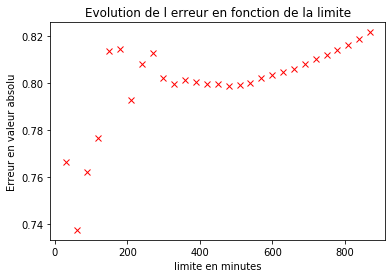

In [30]:
plt.plot(range(30,900,30), res, 'rx')
plt.xlabel('limite en minutes')
plt.ylabel('Erreur en valeur absolu')
plt.title('Evolution de l erreur en fonction de la limite')
plt.show()

,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage,ArrosageHist,index
1906,4/16/2019 1:30:00.000000000 AM,14.640000,26.000000,-0.010000,0.000000,0,840,20,40
1907,4/16/2019 2:00:00.000000000 AM,14.630000,26.000000,-0.066667,-0.013333,0,870,20,40
1908,4/16/2019 2:30:00.000000000 AM,14.563333,25.986667,0.013333,-0.051667,0,900,20,40
1909,4/16/2019 3:00:00.000000000 AM,14.576667,25.935000,-0.070000,-0.035000,0,930,20,40
1910,4/16/2019 3:30:00.000000000 AM,14.506667,25.900000,0.020000,0.000000,0,960,20,40
1911,4/16/2019 4:00:00.000000000 AM,14.526667,25.900000,-0.020000,0.000000,0,990,20,40
1912,4/16/2019 4:30:00.000000000 AM,14.506667,25.900000,-0.066667,-0.048333,0,1020,20,40
1913,4/16/2019 5:00:00.000000000 AM,14.440000,25.851667,0.010000,-0.035000,0,1050,20,40
1914,4/16/2019 5:30:00.000000000 AM,14.450000,25.816667,-0.020000,-0.016667,0,1080,20,40
1915,4/16/2019 6:00:00.000000000 AM,14.430000,25.800000,-0.006667,0.000000,0,1110,20,40


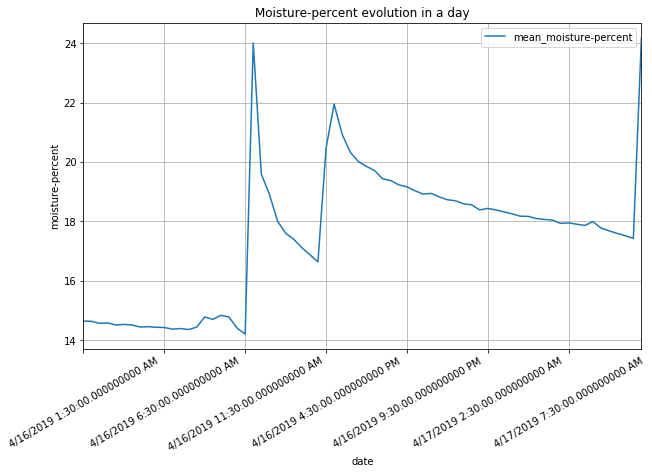

In [44]:
dfGraph = DF.iloc[range(1660,1730),:]
ax = dfGraph.plot(x='date', y=['mean_moisture-percent'],figsize=(10, 6),rot=30,grid=True, title="Moisture-percent evolution in a day")
ax.set_ylabel("moisture-percent")

dfGraph

# Erreur après 24heures

L'erreur ci-dessous représente l'erreur à la dernière itération.

In [134]:
dfEnd = dataTest.loc[dataTest['TAfterArrosage'] == 0]
EndSans = np.mean(dfEnd.iloc[:,8]-dfEnd.iloc[:,1])
EndAvec = np.mean(dfEnd.iloc[:,9]-dfEnd.iloc[:,1])
EndSepare = np.mean(dfEnd.iloc[:,10]-dfEnd.iloc[:,1])

print("Sans le temps : ", EndSans)
print("Avec le temps : ", EndAvec)
print("Avec Temps Séparé : ", EndSepare)


Sans le temps :  22.6970238095
Avec le temps :  -0.192043816914
Avec Temps Séparé :  -0.116894436181




## Essaie avec d'autre méthode